# 1. Importing Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading Dataset

In [3]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')

In [4]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

 ### 2.a Checking Columns And Removing Spaces

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df = df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

### 2.b Checking For Null Values In Columns
* No null values were found in columns

In [8]:
for col in df.columns:
    print(col+' has '+ str(df[col].isnull().sum()) + ' null values')

Serial No. has 0 null values
GRE Score has 0 null values
TOEFL Score has 0 null values
University Rating has 0 null values
SOP has 0 null values
LOR has 0 null values
CGPA has 0 null values
Research has 0 null values
Chance of Admit has 0 null values


### 2.c understanding datatypes in dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

              LOR        CGPA    Research  Chance of Admit  
count  400.000000  400.000000  400.000000       400.000000  
mean     3.452500    8.598925    0.547500         0.724350  
std      0.898478    0.596317    0.498362         0.142609  
min      1.000000    6.800000    0.000000         0.340000  
25%      3.000000    8.170000    0.000000         0.640000  
50%      3.500000    8.610000    1.000000         0.730000  
75%      4.000000    9.062500    1.000000         0.830000  
max      5.000000    9.920000    1.000000         0.970000

## 3. Exploratory Data Analysis

### 3.a Checking for columns with categorical data and contineous data
* Columns SOP,LOR,Research And University Rating have categorical data
* Refrence Links
    https://www.datacamp.com/community/tutorials/categorical-data
    

In [11]:
for col in df.columns:
    print(col + ' ' + str(len(df[col].value_counts())))

Serial No. 400
GRE Score 49
TOEFL Score 29
University Rating 5
SOP 9
LOR 9
CGPA 168
Research 2
Chance of Admit 60


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


checking distinct values in categorical features

In [13]:
catList = ['Research','SOP','LOR','University Rating']
for col in catList:
    print(df[col].unique())

[1 0]
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
[4 3 2 5 1]


### 3.b Checking Distribution Of Each Column

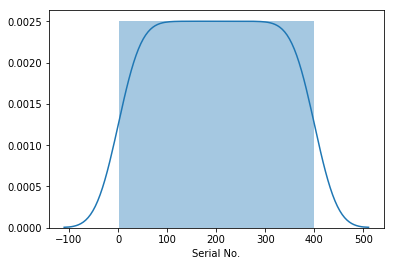

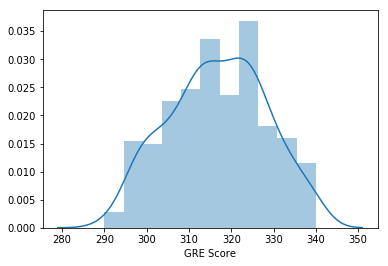

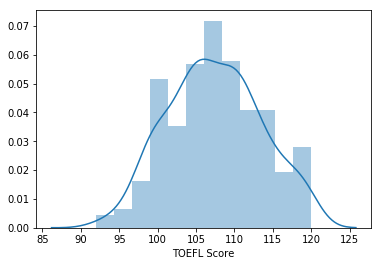

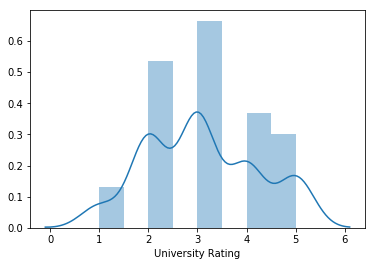

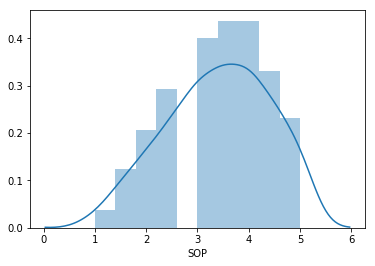

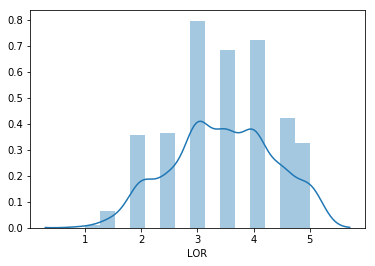

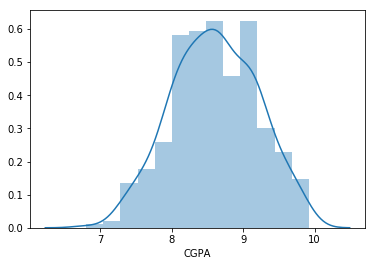

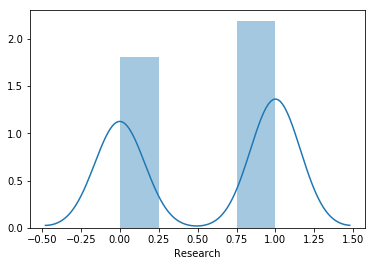

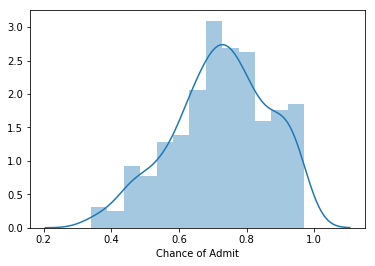

In [14]:
for col in df.columns:
    plt.figure()
    sns.distplot(df[col])

### 3.c Checking relation between target feature and each feature
> no conclusion can be drawn from serial number <br>
> chance of admit increases with increase in gre score <br>
> chance of admit increases with increase in toefl score <br>
> chance of admit increases with increase in university rating <br>
> chance of admit increases with increase in SOP <br>
> chance of admit increases with increase in LOR <br>
> chance of admit increases with increase in CGPA <br>
> chance of admit increases with increase in Research <br>

<Figure size 432x288 with 0 Axes>

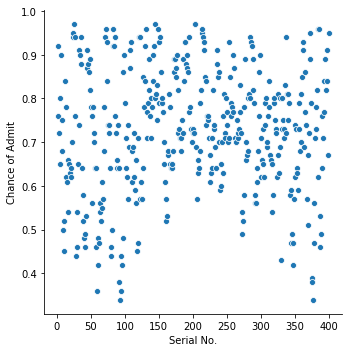

<Figure size 432x288 with 0 Axes>

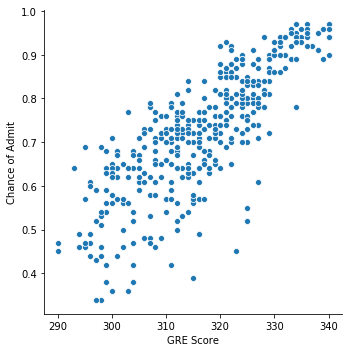

<Figure size 432x288 with 0 Axes>

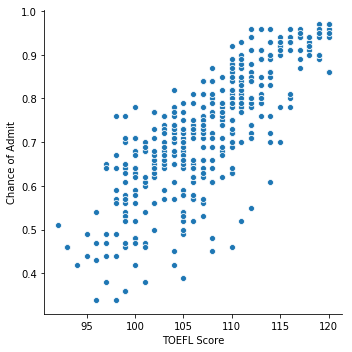

<Figure size 432x288 with 0 Axes>

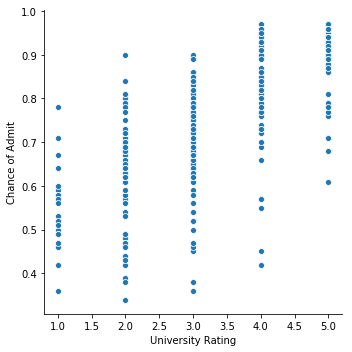

<Figure size 432x288 with 0 Axes>

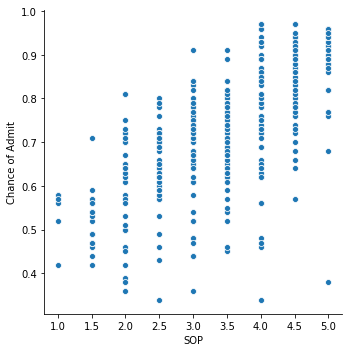

<Figure size 432x288 with 0 Axes>

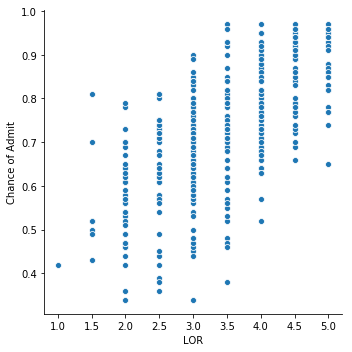

<Figure size 432x288 with 0 Axes>

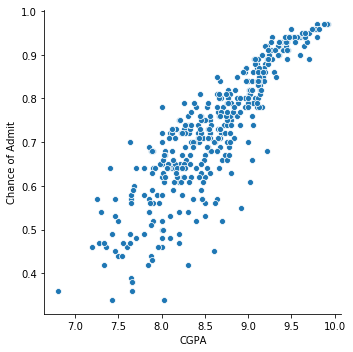

<Figure size 432x288 with 0 Axes>

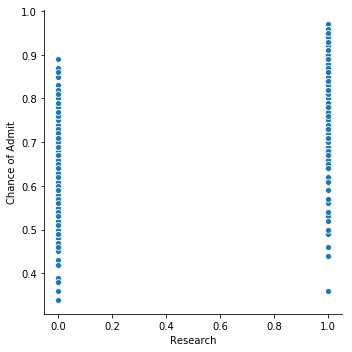

In [15]:
for col in df.columns:
    if col != 'Chance of Admit':
        plt.figure()
        sns.relplot(x=col,y='Chance of Admit',data=df)
        plt.ylabel('Chance of Admit')
        plt.xlabel(col)

### 3.d Plotting Categorical Distributions
> Chance Of Admit is more with research <br>
> Chance of Admit increases with SOP <br>
> Chance Of Admit increases with LOR <br>
> CHance of admit increases with University Rating <br>

<Figure size 432x288 with 0 Axes>

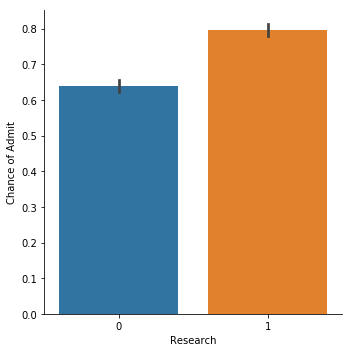

<Figure size 432x288 with 0 Axes>

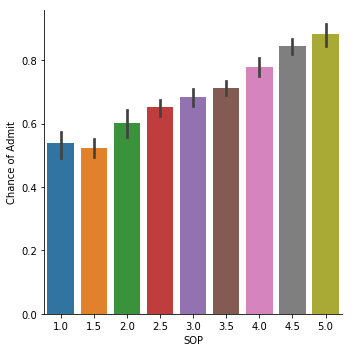

<Figure size 432x288 with 0 Axes>

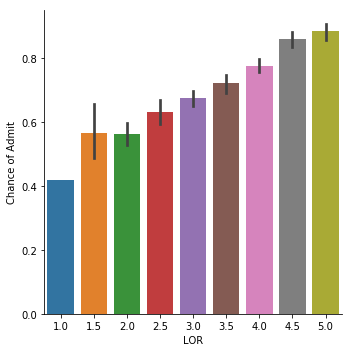

<Figure size 432x288 with 0 Axes>

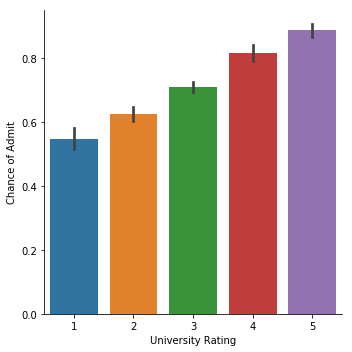

In [16]:
for col in catList:
    plt.figure()
    sns.catplot(x=col,y='Chance of Admit',kind='bar',data=df)

### 3.e Checking Correlation Between Features
> Serial No. has no relation to Chance Of Admit <br>
> CGPA, GRE Score, TOEFL Score and University Rating are top 5 parameters <br>
> Serial No. is not showing much correlation with any feature <br>
> GRE Score score has strong coorelation with TOEFL Score and CGPA <br>
> Research correlations are not very strong with any feature <br>

In [17]:
dfCorr = df.corr()
dfCorr['Chance of Admit'].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit, dtype: float64

#### 3.e.1 correlational maps

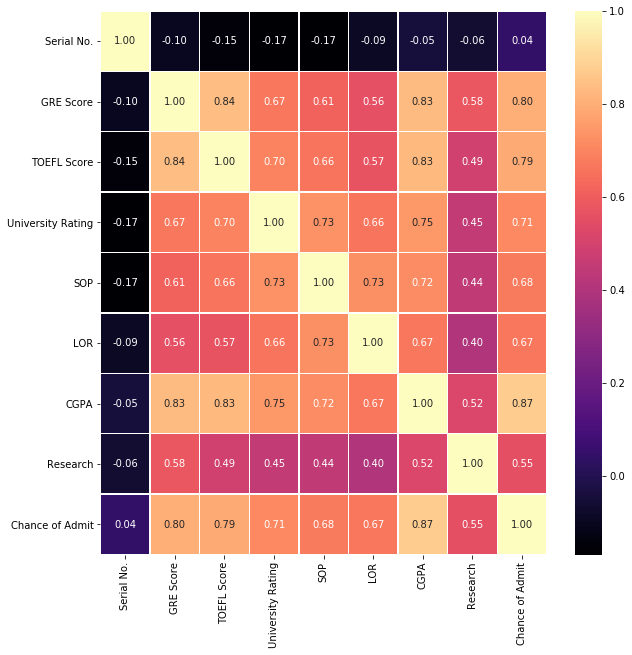

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(dfCorr,annot=True,linewidths=.5,cmap="magma",fmt='.2f')

## 4.Feature Engineering

### 4.a Outlier detection

In [19]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for col in features:
        #1st quartile
        Q1 = np.percentile(df[col],25)
        #3rd quartile
        Q3 = np.percentile(df[col],75)
        #Interquartile range
        IQR = Q3-Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        #list of indices of outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                             (df[col] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    return outlier_indices

In [20]:
outliers_to_drop = detect_outliers(df,df.columns)
outlierDf = df.loc[outliers_to_drop]

In [21]:
df = df.drop(outliers_to_drop,axis=0).reset_index(drop=True)

In [22]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

### 4.c Feature Selection
> from correlation analysis we can remove serial number column

In [23]:
df = df.drop(['Serial No.'], axis=1)

[0.11977561 0.15562412 0.05338862 0.06132903 0.07579122 0.49279996
 0.04129144]


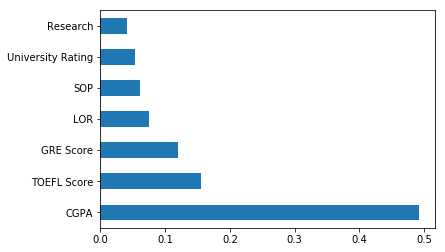

In [24]:
# Feature Importance
X = df.iloc[:,:7]
Y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 4.b Encoding
> since for research both 0 and 1 are at same level this needs one hot encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
# saving a copy
dfEnc = df.copy()

In [26]:
enc = OneHotEncoder(categorical_features=[6])
dfEnc = enc.fit_transform(dfEnc).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [27]:
dfEnc.shape

(396, 9)

In [28]:
dfEnc = pd.DataFrame(dfEnc)

In [29]:
dfEnc.head()

0    1      2      3    4    5    6     7     8
0  0.0  1.0  337.0  118.0  4.0  4.5  4.5  9.65  0.92
1  0.0  1.0  324.0  107.0  4.0  4.0  4.5  8.87  0.76
2  0.0  1.0  316.0  104.0  3.0  3.0  3.5  8.00  0.72
3  0.0  1.0  322.0  110.0  3.0  3.5  2.5  8.67  0.80
4  1.0  0.0  314.0  103.0  2.0  2.0  3.0  8.21  0.65

In [30]:
df.head()
df.rename(columns={})

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
391        324          110                  3  3.5  3.5  9.04         1   
392        325          107                  3  3.0  3.5  9.11         1   
393        330          116                  4  5.0  4.5  9.45         1   
394        312          103                  3  3.5  4.0  8.78         0   
395        333          117                  4  5.0  4.0  9.66         1   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
391             0.82  
392             0.84  
393             0.91  
394             0.67  
395             0.95  

[396 rows x 8 columns]

## 5. Feature Scaling and Data Split

In [79]:
y = pd.DataFrame(dfEnc.iloc[:,-1])
x = dfEnc.iloc[:,0:8]

### 5.a) Splitting data

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 5.b) Scaling Data

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 6 Regression Algorithms

In [34]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet 
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
modelList = [LinearRegression, Ridge,Lasso, ElasticNet,BayesianRidge,
SVR,SGDRegressor,KNeighborsRegressor,GaussianProcessRegressor,RandomForestRegressor,
DecisionTreeRegressor]

In [35]:
RegModelScores = []
def predictFunc(model):
    model=model()
    model_name = model.__class__.__name__
    model.fit(x_train,y_train)
    model_score_test = model.score(x_test,y_test)
    model_score_train = model.score(x_train,y_train)
    model_pred = model.predict(x_test)
    
    plt.figure()
    sns.distplot(y_test,hist=False,color='blue')
    sns.distplot(model_pred,hist=False,color='red')
    plt.xlabel(model_name)
    RegModelScores.append([model_name,model_score_test,model_score_train])

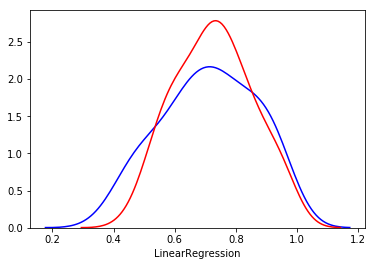

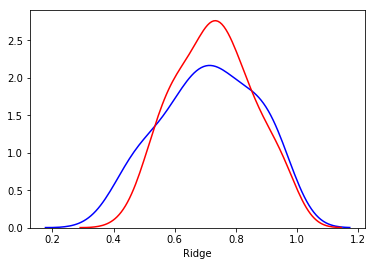

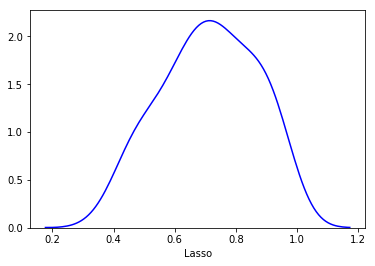

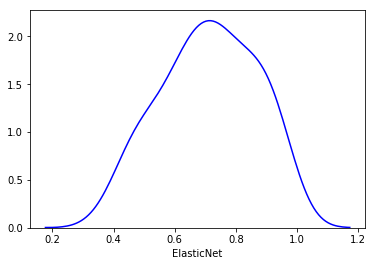

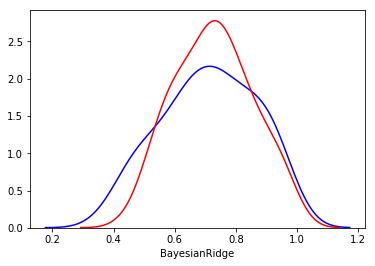

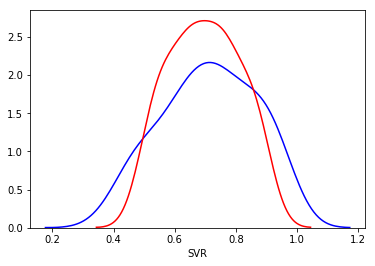

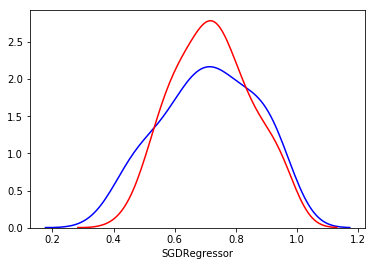

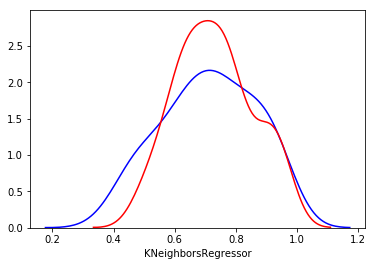

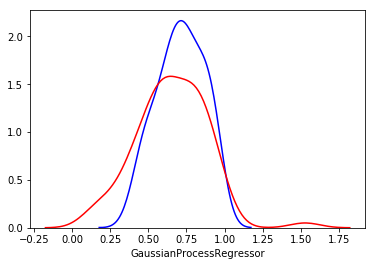

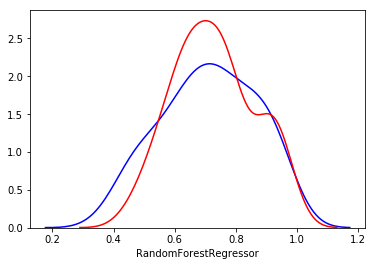

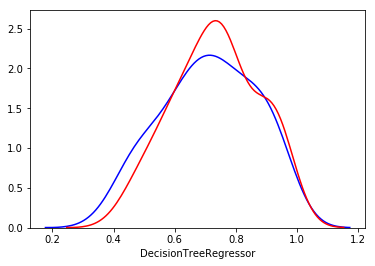

In [36]:
for model in modelList:
    predictFunc(model)

### 6.a) Regression Algorithms Chart Representation
> Linear Regression has highest Score

In [37]:
dfReg = pd.DataFrame(RegModelScores,columns=['model','train_score','test_score'])

In [38]:
dfReg

model  train_score  test_score
0           LinearRegression     0.798053    0.795787
1                      Ridge     0.800208    0.795880
2                      Lasso    -0.017781    0.000000
3                 ElasticNet    -0.017781    0.000000
4              BayesianRidge     0.800054    0.795697
5                        SVR     0.740245    0.745588
6               SGDRegressor     0.802861    0.790507
7        KNeighborsRegressor     0.761683    0.824710
8   GaussianProcessRegressor    -0.306290    1.000000
9      RandomForestRegressor     0.780038    0.949869
10     DecisionTreeRegressor     0.609812    1.000000

### 6.b) Regression Algorithms Visual Representation

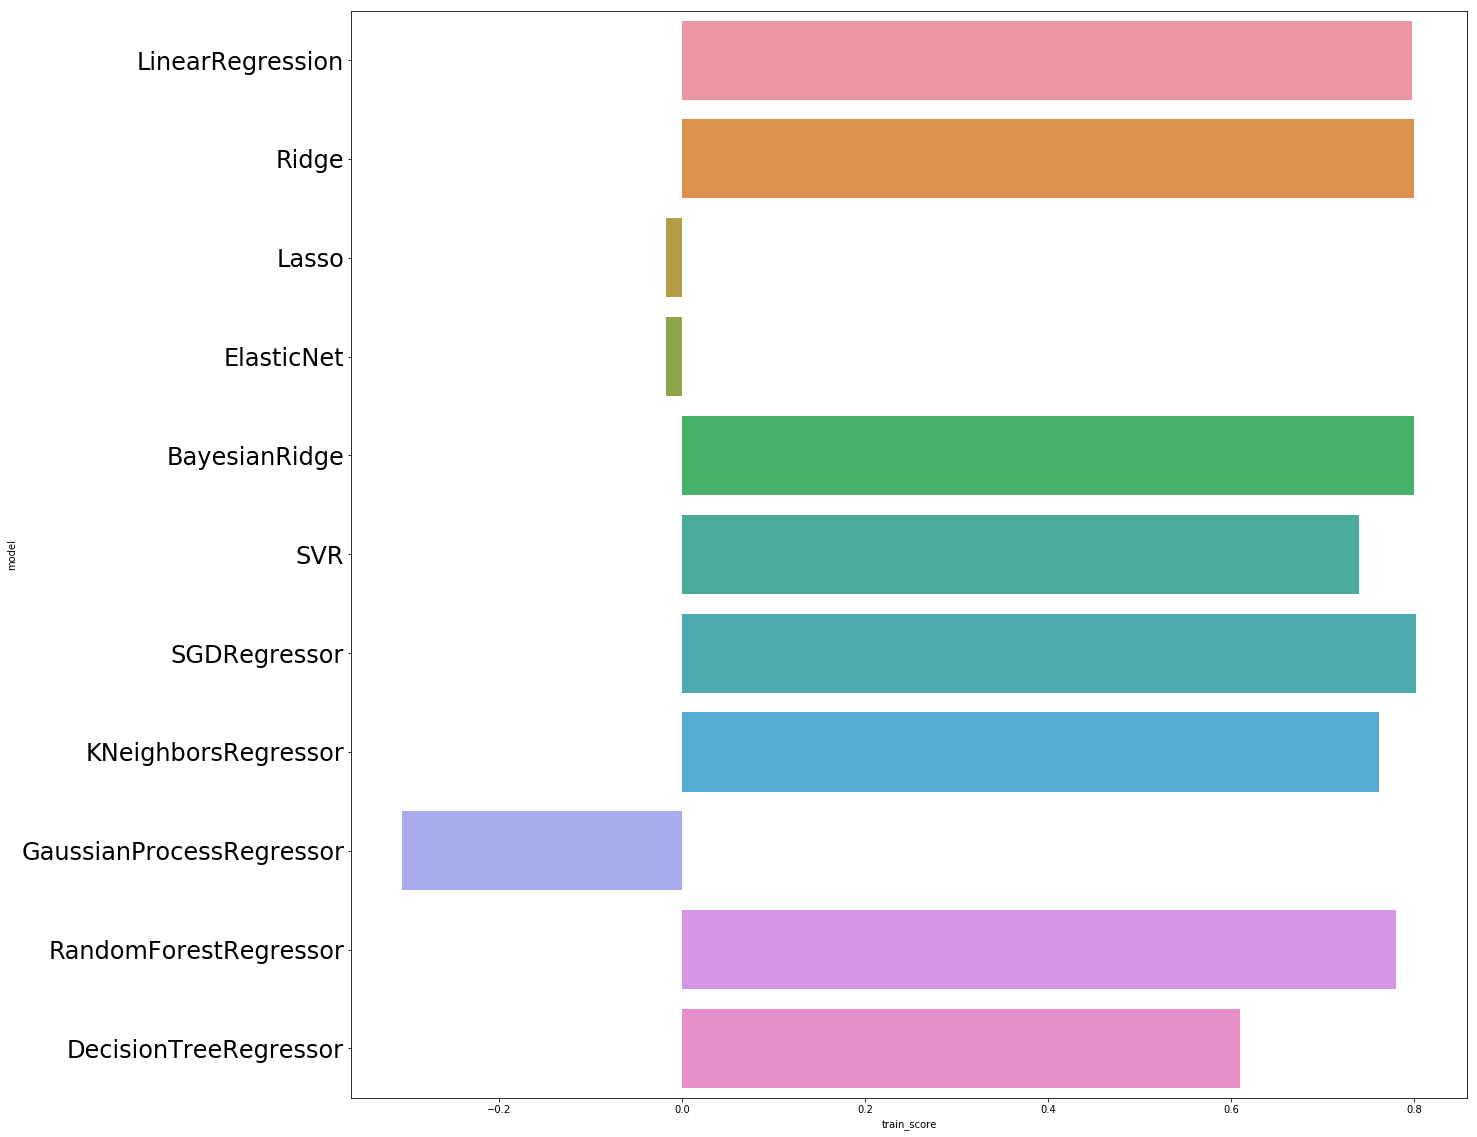

In [39]:
fig,ax = plt.subplots(figsize=(20,20))
p2 = sns.catplot(ax=ax,y='model',x='train_score',data=dfReg,kind='bar')
#p2.set_xticklabels(p2.get_xticklabels(),rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=24)
plt.close(p2.fig)

## 7. Classification Algorithms
> Random Forest CLassifier is the most suitable model to use

### 7.a) preparing target value (making it discrete from contineous)
> We are assuming that if chance of admit is more that 0.8 student will get selected

In [40]:
y_train[8] = y_train[8].apply(lambda x:1 if x>0.8 else 0)
y_test[8] = y_test[8].apply(lambda x:1 if x>0.8 else 0)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve

In [75]:
conMatList = []
prcList = []
clRep= []
rocDet = []
preScore = []
recScore = []
f1Score = []
yPred = []

def getClassModel(model):
    model = model()
    model_name = model.__class__.__name__
    model.fit(x_train,y_train)
    
    #getting prediction
    y_pred = model.predict(x_test)
    yPred.append([model_name,y_pred])
    
    # getting scores
    
    pre_score = precision_score(y_test,y_pred)
    rec_score= recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    preScore.append([model_name,pre_score])
    recScore.append([model_name,rec_score])
    f1Score.append([model_name,f1score])
    
    ## getting confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    matrix = pd.DataFrame(cm,columns=['predicted 0','predicted 1'],
                         index=['Actual 0','Actual 1'])
    conMatList.append([model_name,matrix])
    
     ## getting precision recall curve values
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
    prcList.append([model_name,precision,recall,thresholds])
    
    ## roc details
    
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    rocDet.append([model_name,fpr,tpr,thresholds])
    
    ## classification report
    
    classRep = classification_report(y_test,y_pred)
    clRep.append([model_name,classRep])

In [76]:
kfold = StratifiedKFold(n_splits=10)
classModelList = [LogisticRegression,SVC,GaussianNB,DecisionTreeClassifier
                 ,RandomForestClassifier,KNeighborsClassifier]

for model in classModelList:
    getClassModel(model)
    


## 7.b) Generating cross validation chart

In [68]:
#getting cross validation scores for each model
cv_results = []
for model in classModelList:
    cv_results.append(cross_val_score(model(),x_train,y_train,scoring='accuracy',
                                     cv=kfold,n_jobs=4))
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
model_name = []
for model in classModelList:
    modelIns = model()
    model_name.append(modelIns.__class__.__name__)
    
cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValErrors":cv_std,
    "Model":model_name
})
  
cv_res

CrossValMeans  CrossValErrors                   Model
0       0.930520        0.036630      LogisticRegression
1       0.931000        0.047582                     SVC
2       0.879695        0.070086              GaussianNB
3       0.879998        0.056529  DecisionTreeClassifier
4       0.921133        0.042849  RandomForestClassifier
5       0.911550        0.050604    KNeighborsClassifier

## 7.c) Generating prediction distribution chart

True

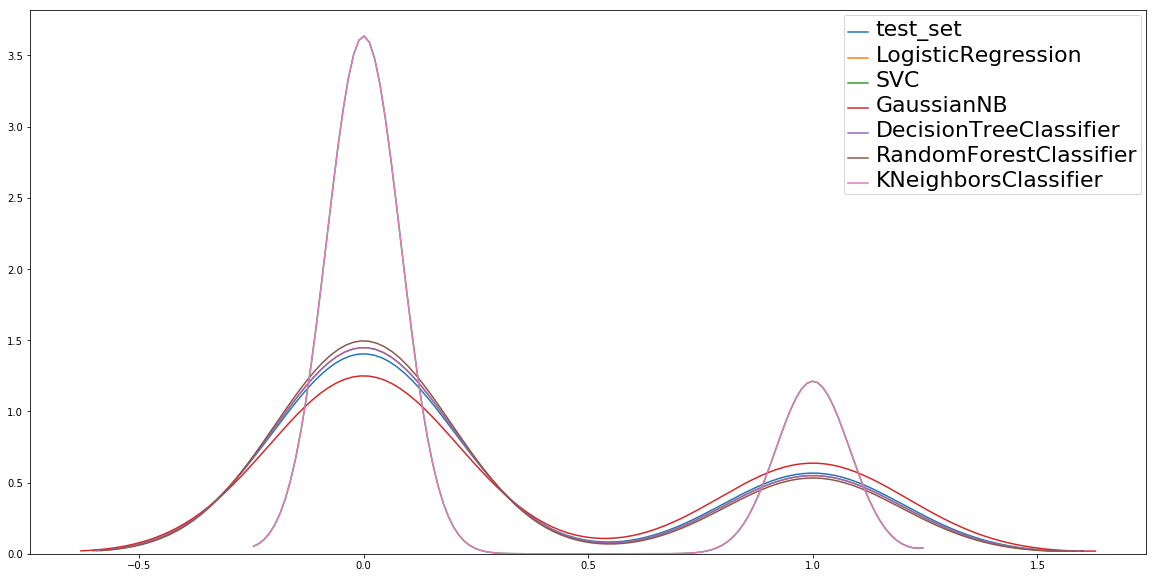

In [69]:
fig,ax = plt.subplots(figsize=(20,10))
p2 = sns.distplot(y_test,hist=False,label='test_set',ax=ax)
for pred in yPred:
    sns.distplot(pred[1],hist=False,label=pred[0],ax=ax)
plt.setp(ax.get_legend().get_texts(), fontsize='22') 
1==1
#plt.close()

## 7.d) Generating Confusion Matrix Chart

In [70]:
#conMatList,prcList ,clRep ,rocDet ,preScore ,recScore 
for mat in conMatList:
    print(mat[0])
    print(' ')
    print(mat[1])
    print('-----------------------------------------------')

LogisticRegression
 
          predicted 0  predicted 1
Actual 0           54            3
Actual 1            4           19
-----------------------------------------------
SVC
 
          predicted 0  predicted 1
Actual 0           55            2
Actual 1            5           18
-----------------------------------------------
GaussianNB
 
          predicted 0  predicted 1
Actual 0           53            4
Actual 1            0           23
-----------------------------------------------
DecisionTreeClassifier
 
          predicted 0  predicted 1
Actual 0           53            4
Actual 1            5           18
-----------------------------------------------
RandomForestClassifier
 
          predicted 0  predicted 1
Actual 0           55            2
Actual 1            4           19
-----------------------------------------------
KNeighborsClassifier
 
          predicted 0  predicted 1
Actual 0           55            2
Actual 1            5           18
-----------------

## 7.e) Generating precision,f1 and recall score Chart

In [71]:
precisionDf = pd.DataFrame(preScore,columns=['model','precisionScore'])
recallDf = pd.DataFrame(recScore,columns=['model','recallScore'])
f1Df = pd.DataFrame(f1Score,columns=['model','f1Score'])
precisionDf['f1Score'] = f1Df['f1Score']
precisionDf['recallScore'] = recallDf['recallScore']
precisionDf

model  precisionScore   f1Score  recallScore
0      LogisticRegression        0.863636  0.844444     0.826087
1                     SVC        0.900000  0.837209     0.782609
2              GaussianNB        0.851852  0.920000     1.000000
3  DecisionTreeClassifier        0.818182  0.800000     0.782609
4  RandomForestClassifier        0.904762  0.863636     0.826087
5    KNeighborsClassifier        0.900000  0.837209     0.782609

## 7.f) Generating ROC Curve

LogisticRegression
SVC
GaussianNB
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier


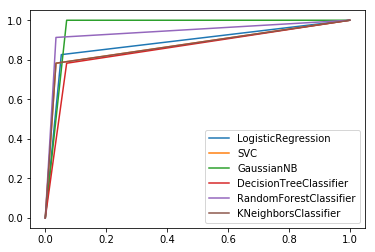

In [77]:
for roc in rocDet:
    print(roc[0])
    fpr = roc[1]
    tpr = roc[2]
    plt.plot(fpr,tpr,label=roc[0])
    plt.legend()


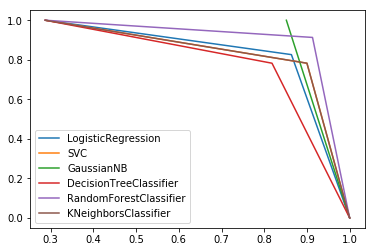

In [78]:
for prc in prcList:
    precision = prc[1]
    recall = prc[2]
    plt.plot(precision,recall,label=prc[0])
    plt.legend()

## 8 Finalising algorithms and saving models


### 8.a) Regression Althorithm
> Linear Regression is selected as final prediction algorithm

In [86]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#saving model
import pickle
pkl_Filename = "regModel"

with open(pkl_Filename, 'wb') as file:
    pickle.dump(lreg,file)

In [124]:
#cheking if model saved works
with open(pkl_Filename, 'rb') as file: 
    print(file)
    Pickled_LR_Model = pickle.load(file)

y_pred = Pickled_LR_Model.predict(x_test[0].reshape(1,-1))

<_io.BufferedReader name='regModel'>


In [125]:
# creating link to download the model
from IPython.display import FileLink
FileLink(pkl_Filename)

/kaggle/working/regModel

### 8.b) Saving Classification Model
> Random Forest Classifier was selected

In [126]:
#preparing data for classification
y_train[8] = y_train[8].apply(lambda x:1 if x>0.8 else 0)
y_test[8] = y_test[8].apply(lambda x:1 if x>0.8 else 0)

In [127]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
#saving model
import pickle
pkl_Filename = "classModel"

with open(pkl_Filename, 'wb') as file:
    pickle.dump(rfc,file)

In [139]:
#cheking if model saved works
with open(pkl_Filename, 'rb') as file: 
    print(file)
    Pickled_LR_Model = pickle.load(file)

y_pred = Pickled_LR_Model.predict(x_test)

<_io.BufferedReader name='classModel'>


In [140]:
# creating link to download the model
from IPython.display import FileLink
FileLink(pkl_Filename)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])